# Programming Exercise - Support Vector Machines

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from stemming.porter2 import stem

from scipy.io import loadmat
from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
def plot_data(X, y):
    pos = (y==1).ravel()
    neg = (y==0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [5]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:,0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:,1].max()+pad
    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plot_data(X, y)
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print("Number of support vectors: ", svc.support_.size)

## Support Vector Machines

### Example Dataset 1

In [7]:
data1 = loadmat('data/ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [8]:
y1 = data1['y']
X1 = data1['X']

print("X1: ", X1.shape)
print("y1: ", y1.shape)

X1:  (51, 2)
y1:  (51, 1)


In [9]:
plot_data(X1, y1)

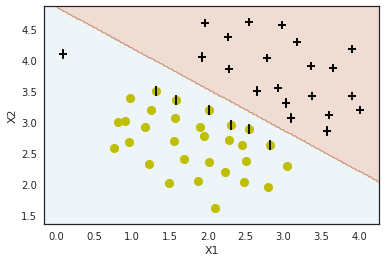

Number of support vectors:  12


In [10]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

### SVM with Gaussian Kernels

In [11]:
def gaussian(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return np.exp(-norm/(2*sigma**2))

In [12]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])

sigma = 2

gaussian(x1, x2, sigma)

0.32465246735834974

### Example dataset 2

In [13]:
data2 = loadmat('data/ex6data2.mat')

X2 = data2['X']
y2 = data2['y']
plot_data(X2, y2)

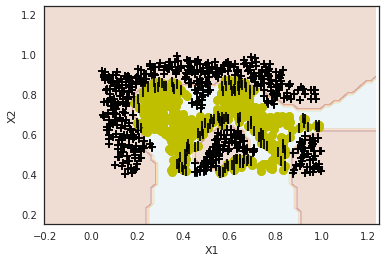

Number of support vectors:  254


In [14]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

### Exemple dataset 3

In [15]:
data3 = loadmat('data/ex6data3.mat')

X3 = data3['X']
y3 = data3['y']

plot_data(X3, y3)

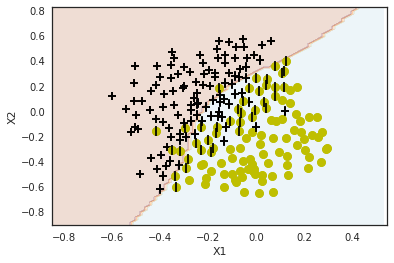

Number of support vectors:  78


In [16]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

### Spam Classification

In [70]:
vocab = pd.read_table('data/vocab.txt')
print(vocab)

         1         aa
0        2         ab
1        3       abil
2        4        abl
3        5      about
4        6       abov
5        7    absolut
6        8       abus
7        9         ac
8       10     accept
9       11     access
10      12     accord
11      13    account
12      14     achiev
13      15     acquir
14      16     across
15      17        act
16      18     action
17      19      activ
18      20     actual
19      21         ad
20      22       adam
21      23        add
22      24      addit
23      25    address
24      26  administr
25      27      adult
26      28     advanc
27      29   advantag
28      30   advertis
29      31      advic
30      32      advis
31      33         ae
32      34         af
33      35     affect
34      36     affili
35      37     afford
36      38     africa
37      39      after
38      40         ag
39      41      again
40      42    against
41      43      agenc
42      44      agent
43      45        ago
44      46

In [62]:
def preprocess(file):
    with open('data/puntuations.txt') as punc:
        puntuations = punc.read()
    with open(file) as f:
        email_contents = f.read()
    email_contents = email_contents.lower()
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)
    email_contents = re.sub('[0-9]+', 'number', email_contents)
    email_contents = re.sub('(http|https)://[^\s]*', "httpaddr", email_contents)
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)
    email_contents = re.sub('[$]+', 'dollar', email_contents)
    email_contents = " ".join(str(i) for i in [stem(word) for word in email_contents.split()])
    for i in puntuations:
        email_contents = "".join([str(x) for x in email_contents.split(i) if x.strip()])
    return email_contents

In [63]:
sample_email = 'data/ex6emailSample1.txt'
preprocessed_email = preprocess(sample_email)
print(preprocessed_email)

 anyon know how much it cost to host a web portal   well it depend on how mani visitor your expecting this can be anywher from less than number buck a month to a coupl of dollarnumber you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from this mail list send an email to emailaddr


In [72]:
X = []
for i in preprocessed_email.split():
    if i in vocab["aa"]:
        X[i] = 1
    else:
        X[i] = 0
print(X)

TypeError: list indices must be integers or slices, not str

In [71]:
vocab["aa"]

0              ab
1            abil
2             abl
3           about
4            abov
5         absolut
6            abus
7              ac
8          accept
9          access
10         accord
11        account
12         achiev
13         acquir
14         across
15            act
16         action
17          activ
18         actual
19             ad
20           adam
21            add
22          addit
23        address
24      administr
25          adult
26         advanc
27       advantag
28       advertis
29          advic
30          advis
31             ae
32             af
33         affect
34         affili
35         afford
36         africa
37          after
38             ag
39          again
40        against
41          agenc
42          agent
43            ago
44           agre
45      agreement
46            aid
47            air
48             al
49            alb
50          align
51            all
52          allow
53         almost
54           alon
55        